In [1]:
import ugradio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd

In [3]:
df = pd.read_csv('data/data_012822')
x = np.arange(2048)

# Section 5.4

In [4]:
ugradio.dft.dft??

In [5]:
len(df['data_%s'%('2200')])

2048

In [6]:
def volt_spec(sample, sampling_rate):
    data = df['data_%s'%(sample)]
    Nfreq=int(10*len(data))
    fourier = ugradio.dft.dft(
        data,
        f=np.linspace(-sampling_rate/2.,sampling_rate/2.,num=Nfreq,endpoint=False),
        vsamp=sampling_rate
    )
    return fourier

def power_spec(sample, sampling_rate): #inputs: fgen freq, sample rate (must be strings)
    volt = volt_spec(sample, sampling_rate)
    return volt[0], np.abs(volt[1])**2 #returns power spectrum of specified frequencies

<IPython.core.display.Javascript object>


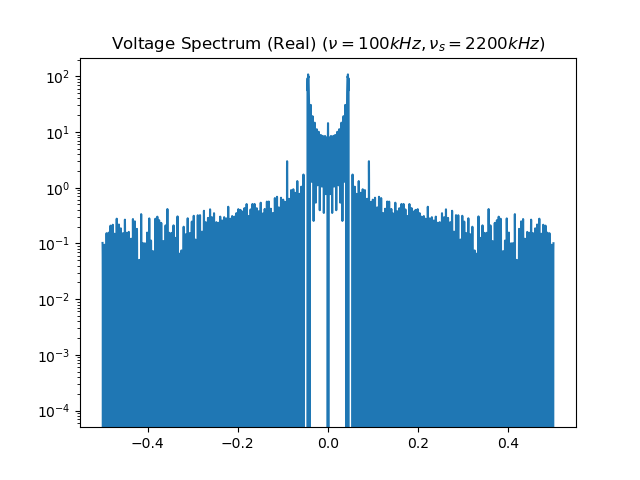

In [7]:
volt_2200 = volt_spec('2200', 1)
plt.figure()
plt.title(r'Voltage Spectrum (Real) $(\nu = 100 kHz, \nu_s = 2200 kHz)$')
plt.semilogy(volt_2200[0], volt_2200[1].real)

<IPython.core.display.Javascript object>


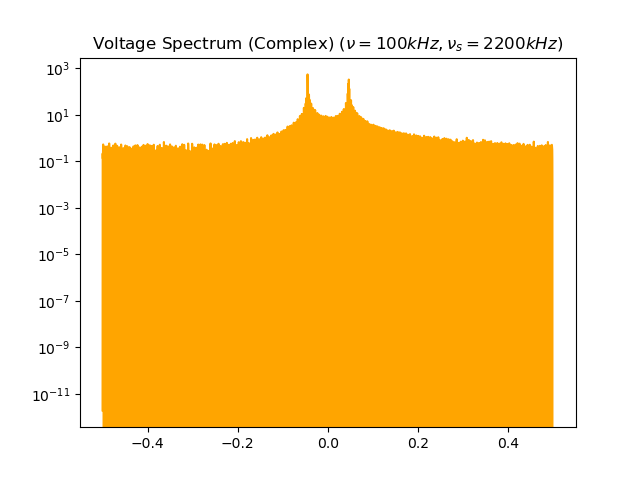

In [8]:
plt.figure()
plt.title(r'Voltage Spectrum (Complex) $(\nu = 100 kHz, \nu_s = 2200 kHz)$')
plt.semilogy(volt_2200[0], volt_2200[1].imag, color = 'orange')

<IPython.core.display.Javascript object>


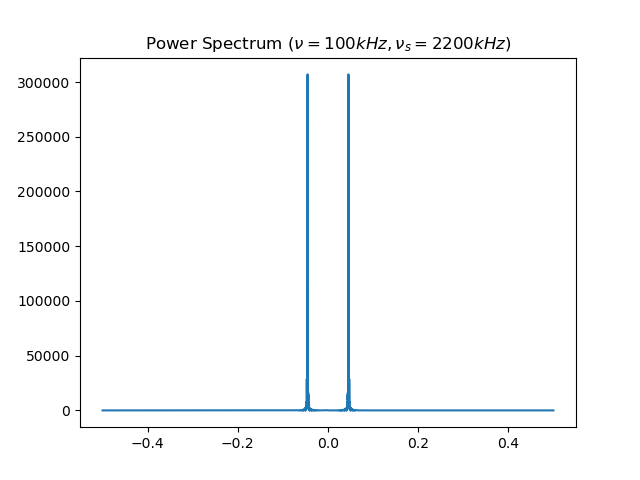

In [9]:
power_2200 = power_spec('2200', 1)
plt.figure()
plt.title(r'Power Spectrum $(\nu = 100 kHz, \nu_s = 2200 kHz)$')
plt.plot(power_2200[0], power_2200[1].real)

<IPython.core.display.Javascript object>


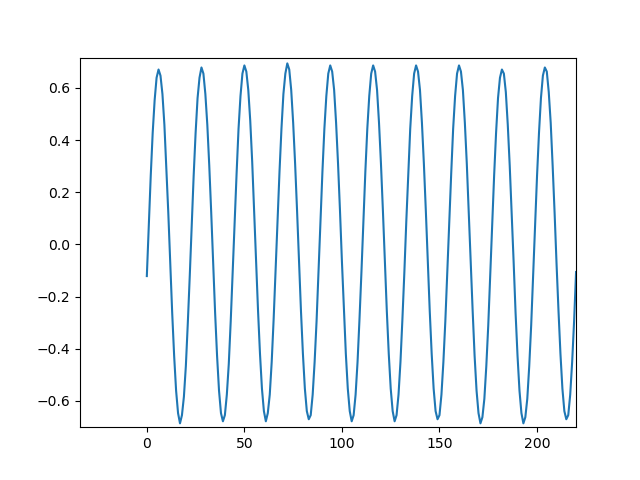

In [10]:
data = df['data_%s'%('2200')]
plt.figure()
plt.plot(data)
plt.show()

# Section 5.6

In [11]:
def volt_spec_W(sample, sampling_rate, W):
    data = df['data_%s'%(sample)]
    #Nfreq=int(10*len(data))
    fourier = ugradio.dft.dft(
        data,
        f=np.linspace(-W*sampling_rate/2.,W*sampling_rate/2.,endpoint=False),
        vsamp=sampling_rate
    )
    return fourier

def power_spec_W(sample, sampling_rate, W): #inputs: fgen freq, sample rate (must be strings)
    volt = volt_spec_W(sample, sampling_rate, W)
    return volt[0], np.abs(volt[1])**2 #returns power spectrum of specified frequencies

<IPython.core.display.Javascript object>


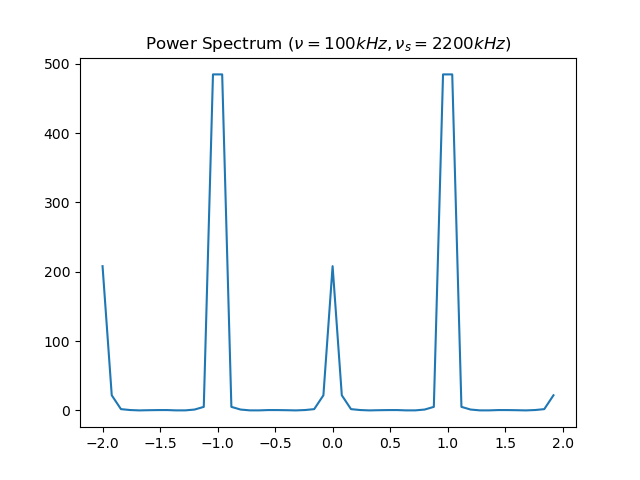

In [15]:
power_2200_W = power_spec_W('2200', 1, 4)
plt.figure()
plt.title(r'Power Spectrum $(\nu = 100 kHz, \nu_s = 2200 kHz)$')
plt.plot(power_2200_W[0], power_2200_W[1])

# Section 5.5

In [19]:
res_data = pd.read_csv('data/res_data_013122')
res_data

,Unnamed: 0,data_10,data_4,data_1,data_05
0,0,0.035294,1.000000,1.000000,-0.780392
1,1,0.050980,1.000000,1.000000,-1.000000
2,2,0.058824,1.000000,1.000000,-1.000000
3,3,0.050980,0.921569,1.000000,-1.000000
4,4,0.043137,0.694118,1.000000,-1.000000
...,...,...,...,...,...
2043,2043,1.000000,-0.725490,0.207843,-0.278431
2044,2044,1.000000,-1.000000,0.537255,-0.505882
2045,2045,1.000000,-1.000000,0.827451,-0.772549
2046,2046,1.000000,-1.000000,1.000000,-0.905882


In [20]:
data_10 = res_data['data_10']
data_4 = res_data['data_4']
data_1 = res_data['data_1']
data_05 = res_data['data_05']

In [21]:
def power_spec(data):
    fourier = ugradio.dft.dft(data)
    power = np.abs(fourier[1])**2
    return fourier[0], power

<IPython.core.display.Javascript object>


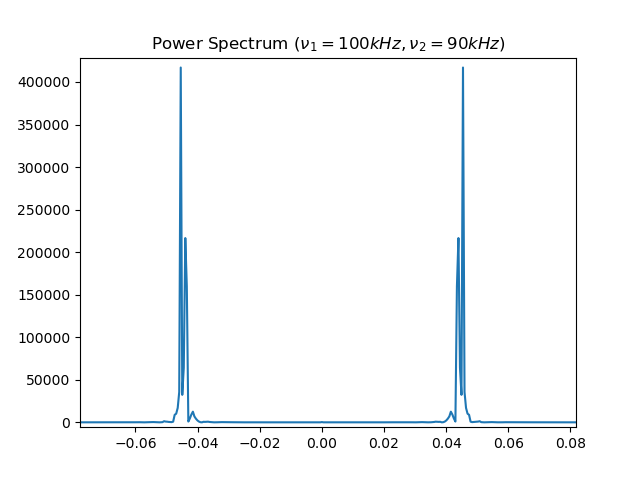

In [22]:
power_spec_10 = power_spec(data_10)
plt.figure()
plt.title(r'Power Spectrum $(\nu_1 = 100 kHz, \nu_2 = 90 kHz)$')
plt.plot(power_spec_10[0], power_spec_10[1])

<IPython.core.display.Javascript object>


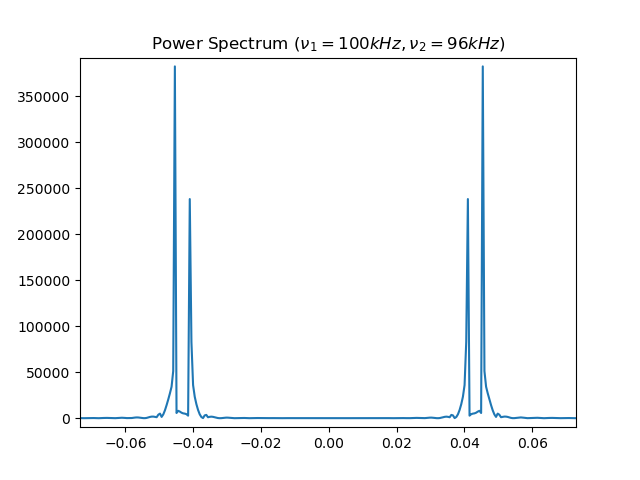

In [23]:
power_spec_4 = power_spec(data_4)
plt.figure()
plt.title(r'Power Spectrum $(\nu_1 = 100 kHz, \nu_2 = 96 kHz)$')
plt.plot(power_spec_4[0], power_spec_4[1])

<IPython.core.display.Javascript object>


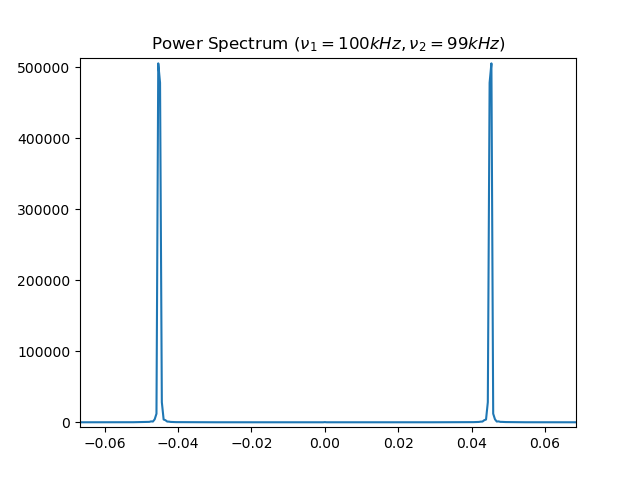

In [25]:
power_spec_1 = power_spec(data_1)
plt.figure()
plt.title(r'Power Spectrum $(\nu_1 = 100 kHz, \nu_2 = 99 kHz)$')
plt.plot(power_spec_1[0], power_spec_1[1])

<IPython.core.display.Javascript object>


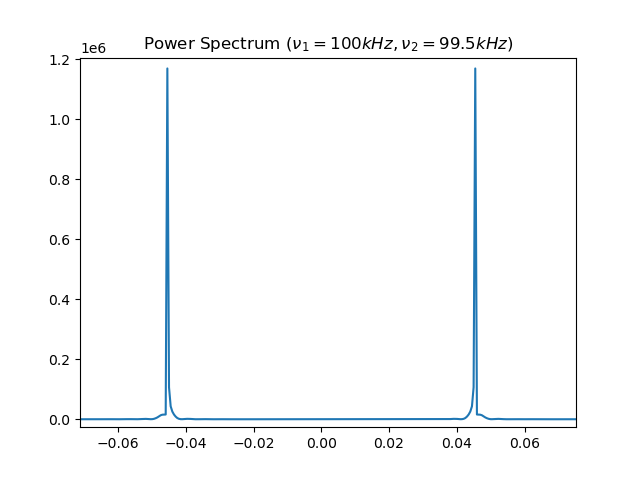

In [26]:
power_spec_05 = power_spec(data_05)
plt.figure()
plt.title(r'Power Spectrum $(\nu_1 = 100 kHz, \nu_2 = 99.5 kHz)$')
plt.plot(power_spec_05[0], power_spec_05[1])